O conjunto utilizado é Instituições de Ensino Básico, que pode ser visualizado rodando o código abaixo:

In [14]:
import numpy as np
import pandas as pd
import csv
from matplotlib import pyplot as plt

inst_ens = pd.read_csv("./datasets/instituicoes_ensino_basico/CADASTRO_MATRICULAS_REGIAO_SUDESTE_SP_2012.csv", 
                               encoding="ISO-8859-1", sep=";", engine="python", header=11, skipfooter=2)
df = pd.DataFrame(data=inst_ens)
df

,ANO_CENSO,PK_COD_ENTIDADE,Nome_Escola,REDE,ID_DEPENDENCIA_ADM,Dependencia_Administrativa,CATESCPRIVADA,Localizacao,REGIAO,FK_COD_ESTADO,...,MATEEINCL,NESCEE,MATESPTOT,NESCEDESP,MATESP,NESCEDESPEXCLUS,MATESPEXCLUS,NESCEDESPCLESP,MATESPCLESP,ESCACESS
0,2012,35000012,AYRES DE MOURA PROFESSOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,6,1,6,0,0,0,0,0,0,0
1,2012,35000024,GAVIAO PEIXOTO BRIGADEIRO,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,21,1,21,0,0,0,0,0,0,0
2,2012,35000036,JOAO SOLIMEO,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,27,1,27,0,0,0,0,0,0,0
3,2012,35000048,WALFREDO ARANTES CALDAS PROFESSOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,8,1,8,0,0,0,0,0,0,0
4,2012,35000059,SEBASTIAO DE OLIVEIRA GUSMAO PROFESSOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,5,1,5,0,0,0,0,0,0,0
5,2012,35000061,SUZANA DE CAMPOS DONA,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,9,1,9,0,0,0,0,0,0,1
6,2012,35000073,JULIO DE FARIA E SOUZA PROFESSOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,1,1,1,0,0,0,0,0,0,0
7,2012,35000085,JULIO CESAR DE OLIVEIRA PROFESSOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,30,1,30,0,0,0,0,0,0,1
8,2012,35000097,RENATO DE ARRUDA PENTEADO PROFESSOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,4,1,4,0,0,0,0,0,0,1
9,2012,35000103,JOAO BOEMER JARDIM PROFESSOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,7,1,7,0,0,0,0,0,0,1


**1. O desbalanceamento, em geral, causa problemas para a classificação. Trate o desbalanceamento
utilizando as abordagens de subamostragem, superamostragem. Mostre a distribuição das classes após
o balanceamento**

In [15]:
print('Distribuição de classes original')
#print(inst_ens.iloc[:, [0,-1]].groupby('REDE').count())

columns = ['REDE', 'Localizacao']
data = inst_ens[columns]
data.groupby('Localizacao').count()

Distribuição de classes original


,REDE
Localizacao,
Rural,1908
Urbana,29151


Subamostragem:

In [17]:
sub_inst_ens = [inst_ens.loc[inst_ens.Localizacao == c, :].sample(n=1908, replace=True) for c in inst_ens.Localizacao.unique()]
print('\n\nFixando o número de exemplos por classe em 1908')
sub_inst_ens = pd.concat(sub_inst_ens)
sub_inst_ens



Fixando o número de exemplos por classe em 1908


,ANO_CENSO,PK_COD_ENTIDADE,Nome_Escola,REDE,ID_DEPENDENCIA_ADM,Dependencia_Administrativa,CATESCPRIVADA,Localizacao,REGIAO,FK_COD_ESTADO,...,MATEEINCL,NESCEE,MATESPTOT,NESCEDESP,MATESP,NESCEDESPEXCLUS,MATESPEXCLUS,NESCEDESPCLESP,MATESPCLESP,ESCACESS
2724,2012,35034538,JOAO VIEIRA DE MELLO,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,6,1,6,0,0,0,0,0,0,0
12237,2012,35176242,BAM BIM NAIO ESCOLA DE EDUC INF E FUNDAMENTAL ...,Privada,4,Privada,NaN,Urbana,Sudeste,35,...,0,0,0,0,0,0,0,0,0,0
8542,2012,35117336,CATARINA DE OLIVEIRA SALGADO ESCOLA MUNICIPAL,Pública,3,Municipal,NaN,Urbana,Sudeste,35,...,3,1,3,0,0,0,0,0,0,1
16987,2012,35235763,PAULA CRISTINA XAVIER PROFA CRECHE,Pública,3,Municipal,NaN,Urbana,Sudeste,35,...,0,0,0,0,0,0,0,0,0,1
24150,2012,35429612,AUBRICK SCHOOL ESCOLA BILINGUE MULTICULTURAL,Privada,4,Privada,Particular,Urbana,Sudeste,35,...,0,0,0,0,0,0,0,0,0,0
8526,2012,35117092,SESI 284 CENTRO EDUCACIONAL,Privada,4,Privada,Particular,Urbana,Sudeste,35,...,4,1,4,0,0,0,0,0,0,1
30936,2012,35925913,DEMETRIO IVAHY BADARO DOUTOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,23,1,23,0,0,0,0,0,0,1
9228,2012,35128016,PARQUE RESIDENCIAL ANTONIO SIMONETTI EMEIEF,Pública,3,Municipal,NaN,Urbana,Sudeste,35,...,12,1,12,0,0,0,0,0,0,0
16020,2012,35224674,MARTHA VIANNA DE OLIVEIRA PROFA CMEI,Pública,3,Municipal,NaN,Urbana,Sudeste,35,...,1,1,1,0,0,0,0,0,0,1
20758,2012,35288056,IZAURA MARTINHO DO NASCIMENTO ESCOLA MUNICIPAL,Pública,3,Municipal,NaN,Urbana,Sudeste,35,...,1,1,1,0,0,0,0,0,0,0


In [18]:
sup_inst_ens = [inst_ens.loc[inst_ens.Localizacao == c, :].sample(n=29151, replace=True) for c in inst_ens.Localizacao.unique()]
print('\n\nFixando o número de exemplos por classe em 29151')
sup_inst_ens = pd.concat(sup_inst_ens)
sup_inst_ens



Fixando o número de exemplos por classe em 29151


,ANO_CENSO,PK_COD_ENTIDADE,Nome_Escola,REDE,ID_DEPENDENCIA_ADM,Dependencia_Administrativa,CATESCPRIVADA,Localizacao,REGIAO,FK_COD_ESTADO,...,MATEEINCL,NESCEE,MATESPTOT,NESCEDESP,MATESP,NESCEDESPEXCLUS,MATESPEXCLUS,NESCEDESPCLESP,MATESPCLESP,ESCACESS
24042,2012,35426313,ESTHER MOURA BARRETO PROFA CRECHE,Pública,3,Municipal,NaN,Urbana,Sudeste,35,...,1,1,1,0,0,0,0,0,0,1
10839,2012,35154568,VAN GOGH LICEU ESCOLA DE ENSINO FUNDAMENTAL E ...,Privada,4,Privada,Particular,Urbana,Sudeste,35,...,1,1,1,0,0,0,0,0,0,0
3979,2012,35051949,EMEI LEOPOLDINA DA,Pública,3,Municipal,NaN,Urbana,Sudeste,35,...,2,1,2,0,0,0,0,0,0,1
29368,2012,35814131,A HEBRAICA ASSOCIACAO BRASILEIRA DE SAO PAULO,Privada,4,Privada,Particular,Urbana,Sudeste,35,...,0,0,0,0,0,0,0,0,0,1
16743,2012,35232981,LEONOR SALOMAO EMEF,Pública,3,Municipal,NaN,Urbana,Sudeste,35,...,20,1,20,0,0,0,0,0,0,0
23131,2012,35376978,ENSINARTE CENTRO EDUCACIONAL,Privada,4,Privada,Particular,Urbana,Sudeste,35,...,1,1,1,0,0,0,0,0,0,1
25320,2012,35441910,ZEFERINO VAZ NAVE MAE,Pública,3,Municipal,NaN,Urbana,Sudeste,35,...,1,1,1,0,0,0,0,0,0,0
19544,2012,35274380,ANTONIO CARLOS DE ABREU SODRE DR EMEF,Pública,3,Municipal,NaN,Urbana,Sudeste,35,...,31,1,31,0,0,0,0,0,0,1
200,2012,35002112,CONGONHAS DO CAMPO VISCONDE DE,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,10,1,10,0,0,0,0,0,0,0
7028,2012,35093658,ESCOLA MUNICIPAL CLOTILDE ALVARES DORATIOTTO,Pública,3,Municipal,NaN,Urbana,Sudeste,35,...,0,0,0,0,0,0,0,0,0,0


In [19]:
def classificacao(data, columns, target, weights):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    weights:    Dicionário. Pesos das classes, cada chave do dicionário é a classe e seu valor a probabilidade
    ---------------------------------------------------------------
    Realiza a classificação em 3 modelos (SVM com kernel linear, 
    SVM com kernel polinomial de grau 3, Árvore de decisão)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados e as medidas de desempenho
    """
    
    # inicializa os modelos com os parâmetros solicitados
    svm_l = SVC(C=10*len(data), kernel='linear', cache_size=500, max_iter=1e6, class_weight=weights)
    svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6, class_weight=weights)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1), class_weight=weights)
    
    clfs = [svm_l, svm_n, dt]
    clfs_names = ['svm_linear', 'svm_poly', 'dt']
    
    # prepara validação cruzada
    # faz divisão do dataset em 5 partes
    cv = KFold(n_splits=5, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'svm_linear':[], 'svm_poly':[], 'dt':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( clf.score(x_test, y_test) )
    
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - acurácia'
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs}

def classifica(data, target, colums, weights):
    print("Target: ", data.columns[target], "\nColumns: ", data.columns[columns], "\n Weights: ", weights)
    data_dropna = data.copy()
    data_dropna.dropna(axis=0, how='any', inplace=True)
    data_dropna = data_dropna.sample(1000)
    classificacao(data_dropna, columns, target, weights)


Classificacao com peso iguais

Target:  Localizacao 
Columns:  Index(['NUM_SALAS_EXISTENTES', 'NUM_FUNCIONARIOS', 'NUM_COMPUTADORES'], dtype='object') 
 Weights:  {'Rural': 0.5, 'Urbana': 0.5}


/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


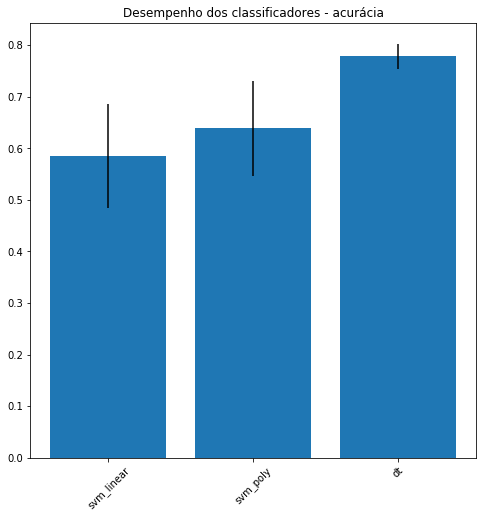

In [20]:
columns = ['Localizacao', 'NUM_SALAS_EXISTENTES', 'NUM_FUNCIONARIOS', 'NUM_COMPUTADORES']
data = sub_inst_ens[columns]

target = 0
columns = [1, 2, 3]
weights={'Rural':0.5, 'Urbana':0.5}
classifica(data, target, columns, weights)

Classificacao com pesos diferentes

Target:  Localizacao 
Columns:  Index(['NUM_SALAS_EXISTENTES', 'NUM_FUNCIONARIOS', 'NUM_COMPUTADORES'], dtype='object') 
 Weights:  {'Rural': 0.75, 'Urbana': 0.25}


/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


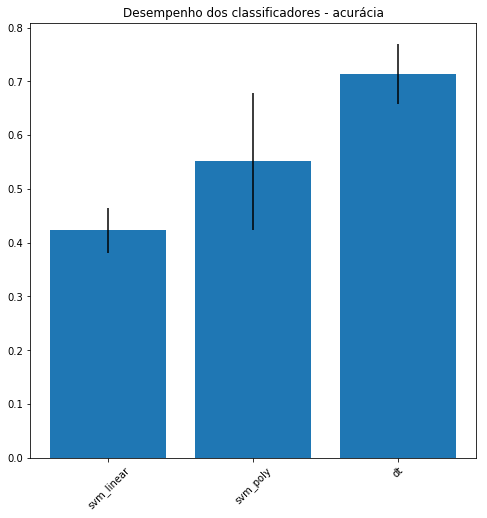

In [21]:
target = 0
columns = [1, 2, 3]
weights={'Rural':0.75, 'Urbana':0.25}
classifica(data, target, columns, weights)

A preferencia do peso para Localização='Rural' teve o intuito de compensar a falta de dados para essa classe, mas como o numero de tuplas da classe 'Urbana' é muito maior deixar de treinar para esse tipo de dado que aparecerá mais nos testes prejudica a pontuacao da rede nos testes.

**2. Faça a conversão entre tipos para dois atributos. Escolha as conversões que achar mais adequada,
quantitativo para qualitativo ou qualitativo para quantitativo. Explique o que você fez e porque achou
essa a melhor forma de fazer.**

Mapeando a combinação de REDE e Localizacao para uma coluna cada onde o valor é 1 se a REDE e Localizacão forem referentes à tupla, e 0 caso contrário.

In [22]:
inst_ens_2 = inst_ens.copy()
inst_ens_2["Rede_Local"] = inst_ens_2["REDE"].map(str) + "_" + inst_ens_2["Localizacao"]

m_map = {'privada_rural' : 1, 'privada_urbana': 0, 'pública_rural' : 0, 'pública_urbana': 0}
inst_ens_2["Privada_Rural"] = inst_ens_2["Rede_Local"].str.lower().map(m_map)

m_map = {'privada_rural' : 0, 'privada_urbana': 1, 'pública_rural' : 0, 'pública_urbana': 0}
inst_ens_2["Privada_Urbana"] = inst_ens_2["Rede_Local"].str.lower().map(m_map)

m_map = {'privada_rural' : 0, 'privada_urbana': 0, 'pública_rural' : 1, 'pública_urbana': 0}
inst_ens_2["Pública_Rural"] = inst_ens_2["Rede_Local"].str.lower().map(m_map)

m_map = {'privada_rural' : 0, 'privada_urbana': 0, 'pública_rural' : 0, 'pública_urbana': 1}
inst_ens_2["Pública_Urbana"] = inst_ens_2["Rede_Local"].str.lower().map(m_map)

inst_ens_2.drop(['Rede_Local'], inplace=True, axis=1)

Convertendo valores numéricos de NUM_SALAS_EXISTENTES para categóricos: baixo, médio e alto

In [23]:
inst_ens_2["NUM_SALAS_EXISTENTES"] = pd.cut(inst_ens_2["NUM_SALAS_EXISTENTES"], bins=[0, 10, 20, 200], include_lowest=True, labels=['baixo', 'medio', 'alto'])

columns = ['REDE', 'Localizacao', 'Privada_Rural', 'Privada_Urbana', 'Pública_Rural', 'Pública_Urbana', 'NUM_SALAS_EXISTENTES', 'NUM_FUNCIONARIOS', 'NUM_COMPUTADORES']
inst_ens_2[columns]

,REDE,Localizacao,Privada_Rural,Privada_Urbana,Pública_Rural,Pública_Urbana,NUM_SALAS_EXISTENTES,NUM_FUNCIONARIOS,NUM_COMPUTADORES
0,Pública,Urbana,0,0,0,1,alto,77.0,27
1,Pública,Urbana,0,0,0,1,alto,191.0,30
2,Pública,Urbana,0,0,0,1,alto,135.0,23
3,Pública,Urbana,0,0,0,1,alto,119.0,7
4,Pública,Urbana,0,0,0,1,medio,79.0,23
5,Pública,Urbana,0,0,0,1,medio,64.0,21
6,Pública,Urbana,0,0,0,1,medio,42.0,19
7,Pública,Urbana,0,0,0,1,medio,52.0,20
8,Pública,Urbana,0,0,0,1,alto,110.0,5
9,Pública,Urbana,0,0,0,1,medio,72.0,21


**3. Realize a normalização de duas colunas. Para normalizar utilize a abordagem 0-1 (slide 27) e z-score
(slide 29).**

Normalização 0-1 da coluna NUM_FUNCIONARIOS

In [24]:
inst_ens_2 = inst_ens_2[columns]
inst_ens_2.dropna(axis=0, how='any', inplace=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inst_ens_2[['NUM_FUNCIONARIOS']] = scaler.fit_transform(inst_ens_2[['NUM_FUNCIONARIOS']])

Normalização z-score da coluna NUM_COMPUTADORES

In [25]:
col = inst_ens_2['NUM_COMPUTADORES']
inst_ens_2['NUM_COMPUTADORES'] = (col - col.mean()) / col.std(ddof=0)

print(inst_ens_2)

          REDE Localizacao  Privada_Rural  Privada_Urbana  Pública_Rural  \
0      Pública      Urbana              0               0              0   
1      Pública      Urbana              0               0              0   
2      Pública      Urbana              0               0              0   
3      Pública      Urbana              0               0              0   
4      Pública      Urbana              0               0              0   
5      Pública      Urbana              0               0              0   
6      Pública      Urbana              0               0              0   
7      Pública      Urbana              0               0              0   
8      Pública      Urbana              0               0              0   
9      Pública      Urbana              0               0              0   
10     Pública      Urbana              0               0              0   
11     Pública      Urbana              0               0              0   
12     Públi

In [30]:
def hist(data, labelx, bins):
    plt.xlabel(labelx, fontsize=14)  
    plt.ylabel("Occurrences", fontsize=14)
    plt.hist(data, bins=bins, fc=(0, 0, 1, 0.5))
    plt.tight_layout()
    plt.show()

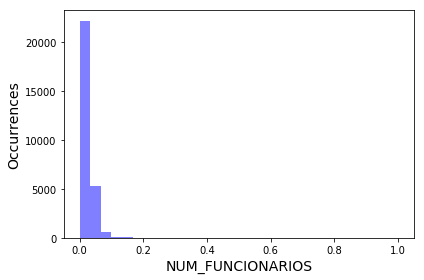

In [31]:
hist(inst_ens_2['NUM_FUNCIONARIOS'].values, 'NUM_FUNCIONARIOS', 30)

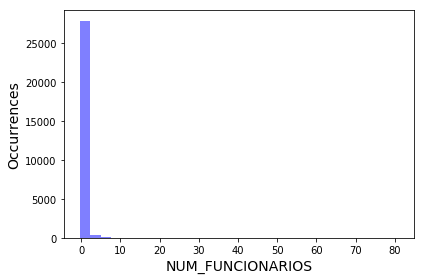

In [32]:
hist(inst_ens_2['NUM_COMPUTADORES'].values, 'NUM_FUNCIONARIOS', 30)